# **Question 1** - Pseudo-Hamiltonian for the Simple Harmonic Oscillator

The Leapfrog method is:

$$v_{n+1/2} = v_n + a_n \frac{\Delta t}{2} = v_n - x_n \frac{\Delta t}{2}$$
$$x_{n+1/2} = x_n + v_{n + 1/2} \Delta t$$
$$v_{n+1} = v_{n + 1/2} + a_{n + 1} \frac{\Delta t}{2} = v_{n + 1/2} - x_{n + 1} \frac{\Delta t}{2}$$

which can be written in Matrix form as:
$$
\begin{pmatrix}
x_{n+1}\\
v_{n+1}
\end{pmatrix} =
\begin{pmatrix}
1 & 0\\
-\frac{h}{2} & 1
\end{pmatrix}
\begin{pmatrix}
1 & h\\
0 & 1
\end{pmatrix}
\begin{pmatrix}
1 & 0\\
-\frac{h}{2} & 1
\end{pmatrix}
\begin{pmatrix}
x_{n}\\
v_{n}
\end{pmatrix}
$$

The Pseudo-Hamiltonian for this system is $$\tilde{H}(h) = \frac{1}{2}x^2 + \frac{1}{2}v^2\frac{1}{1 - h^2/4}$$.

## **a)** Conservation of the Pseudo-Hamiltonian

Use the Jacobian for the leapfrog method to show that the pseudo-Hamiltonian is conserved when using the leapfrog method.

For simplicity, the mass, spring constant, and oscillator frequencies are set to 1 here.

In [1]:
import sympy.matrices as sm
import sympy as sp
from sympy import pprint

def LeapfrogJacobian(dt):
    # Returns the Jacobian matrix for the leapfrog method
    # with timestep dt
    lf1 = sm.Matrix([[1, 0], [-dt/2, 1]])
    lf2 = sm.Matrix([[1, dt], [0, 1]])
    Jlf = lf1*lf2*lf1
    return Jlf

# Define the symbols
x, v = sp.symbols('x v')
h = sp.symbols('h')

# Define the Pseudo-Hamiltonian for the harmonic oscillator
H = x**2 / 2 + 0.5 * v**2 * (1 / (1-h**2/4))

# Leapfrog method
v_half = v - 0.5 * h * sp.diff(H, x)
x_new = x + h * v_half
v_new = v_half - 0.5 * h * sp.diff(H, x).subs({x: x_new})

# Calculate the Jacobian matrices for the leapfrog steps
jacobian_step1 = sp.Matrix([[sp.diff(v_half, v), sp.diff(v_half, x)],
                            [sp.diff(x_new, v), sp.diff(x_new, x)]])
jacobian_step2 = sp.Matrix([[sp.diff(v_new, v), sp.diff(v_new, x)],
                            [sp.diff(x_new, v), sp.diff(x_new, x)]])

# Multiply the Jacobian matrices
combined_jacobian = jacobian_step2 * jacobian_step1
is_symplectic = combined_jacobian.det().simplify() == 1

# Print the results
pprint(sp.simplify(LeapfrogJacobian(h)))
print("Determinant of the Jacobian:", combined_jacobian.det().simplify())
print("Combined Jacobian is symplectic:", is_symplectic)


⎡     2        ⎤
⎢    h         ⎥
⎢1 - ──    h   ⎥
⎢    2         ⎥
⎢              ⎥
⎢ 3           2⎥
⎢h           h ⎥
⎢── - h  1 - ──⎥
⎣4           2 ⎦
Determinant of the Jacobian: 1.00000000000000
Combined Jacobian is symplectic: True


Mathematically, a method is symplectic if the Jacobian matrix of the discrete map has a determinant equal to 1, indicating that the method preserves the phase space volume. This ensures that trajectories in the phase space do not cross, stretch, or fold under the numerical integration, conserving the qualitative behavior of the system. The symplectic property of a numerical method is related to the preservation of the symplectic structure of Hamiltonian dynamics.

Therefore, since the determinant of the Jacobian is equal to 1, the Leapfrog method is symplectic and, therefore, the Pseudo-Hamiltonian must be conserved.

## **b)** Implemenation of the Leapfrog method

Implement the leapfrog method for the simple harmonic oscillator numerically, and verify that they indeed do conserve $\tilde{H}$.

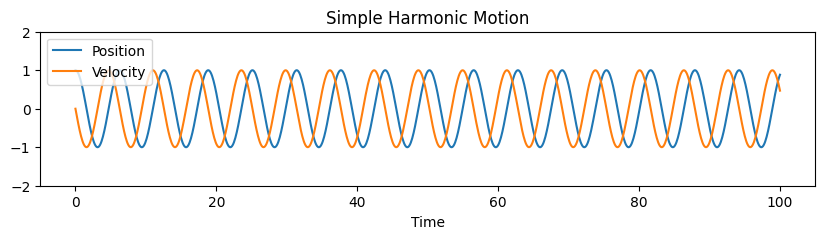

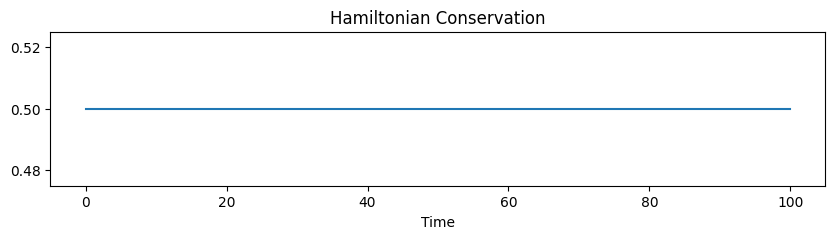

Maximum deviation from initial Hamiltonian: 1.9984014443252818e-15


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Leapfrog(x, v, h, steps):
    # Performs leapfrog integration for a simple harmonic oscillator
    # with initial position x and initial velocity v
    # for a total of steps steps with timestep h
    # Returns the positions and velocities at each step


    # Setting mass and oscillation frequency as 1
    positions = np.array([x])
    velocities = np.array([v])

    for _ in range(steps):
        v -= 0.5 * h * x   # v half step
        x += h * v    # x step
        v -= 0.5 * h * x # v full step
        
        positions = np.append(positions, x)
        velocities = np.append(velocities, v)

    return positions, velocities

def PseudoHamil(x, v, h):
    # Returns the value of the pseudo-Hamiltonian
    # for a simple harmonic oscillator with position x and velocity v
    # with timestep h
    
    H = (x**2 / 2) + ((0.5 * v**2) / (1-(h**2)/4))
    return H

# Initial conditions
x_initial = 1.0
v_initial = 0.0
dt = 0.1
num_steps = 1000

# Perform leapfrog integration
positions, velocities = Leapfrog(x_initial, v_initial, dt, num_steps)

# Calculate Hamiltonian at each step
hamiltonians = [PseudoHamil(x, v, dt) for x, v in zip(positions, velocities)]

# Plot the SHO Motion
time = np.arange(0, dt*num_steps + dt, dt)
plt.figure(1, figsize=(10, 2))
plt.plot(time, positions, label='Position')
plt.plot(time, velocities, label='Velocity')
plt.title("Simple Harmonic Motion")
plt.xlabel('Time')
plt.ylim(-2, 2)
plt.legend()

# Plot the Hamiltonian Conservation
plt.figure(2, figsize=(10, 2))
plt.plot(time, hamiltonians)
plt.title("Hamiltonian Conservation")
plt.xlabel('Time')
plt.ylim(0.475, 0.525)
plt.show()

# Find maxiumum deviation from initial Hamiltonian
max_deviation = max(hamiltonians) - min(hamiltonians)
print("Maximum deviation from initial Hamiltonian:", max_deviation)

Since the Pseudo-Hamiltonian remains constant at 0.5 throughout the course of the simple harmonic motion, with the maximum deviation approaching roundoff error, this verifies that it is conserved.

## **c)** Scaling of Energy Error

Use the code from part b to calculate the scaling of the energy error with the number of steps per oscillation cycle for integrations of:
1. A Half oscillation
2. A Quarter oscillation

Discuss whether the scalings you find agree with the analytic results for the leapfrog method, given that the analytic results for the energy error is known to be:
$$ Error = E_{n+1} - E_n $$
where
$$ E_n  = \frac{x^2 + v^2}{2}$$
$$ E_{n+1} = \frac{h^6x^2}{16} - \frac{h^5vx}{4} + \frac{h^4v^2}{4} - \frac{h^4x^2}{4} + \frac{hv^3x^2}{2} + v^2 + x $$

Therefore,
$$ Error = (\frac{h^6x^2}{16} - \frac{h^5vx}{4} + \frac{h^4v^2}{4} - \frac{h^4x^2}{4} + \frac{hv^3x^2}{2} + v^2 + x) - (\frac{x^2 + v^2}{2})$$

Over a full oscillation, the second, third, fourth, and final terms average out to zero. However, in this case we will be considering a half and a quarter oscillation.

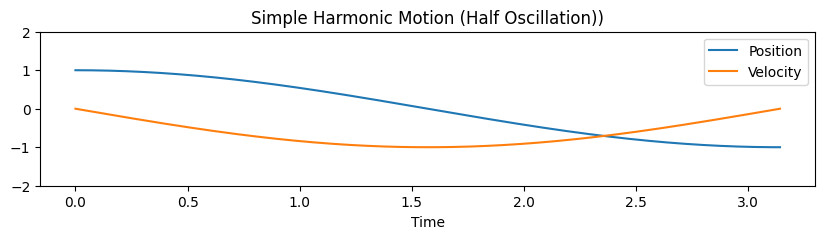

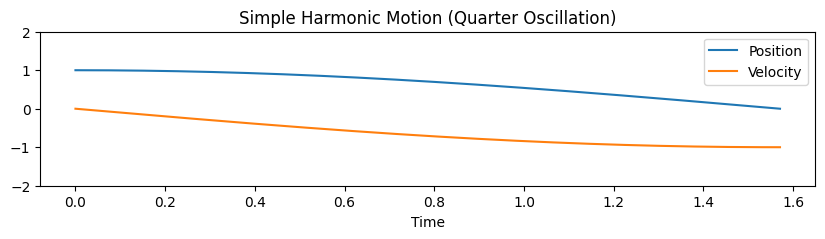

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def Leapfrog_C(x, v, steps, half = True, plot_m = True, plot_e = False):
    # Performs leapfrog integration for a simple harmonic oscillator
    # with initial position x and initial velocity v
    # for a total of steps steps with timestep h
    # Returns the positions and velocities at each step

    # the boolean half determines whether the integration is for a quarter or half oscillation

    # Setting mass and oscillation frequency as 1 (so ignore them)
    positions = np.array([x])
    velocities = np.array([v])
    
    if half:
        # 1 Half Oscillation
        h = np.pi / steps

        for _ in range(steps):
            v -= 0.5 * h * x   # v half step
            x += h * v    # x step
            v -= 0.5 * h * x # v full step

            positions = np.append(positions, x)
            velocities = np.append(velocities, v)

        if plot_m:
            # Plot the SHO Motion
            time = np.arange(0, h*num_steps + h, h)

            plt.figure(figsize=(10, 2))
            plt.plot(time, positions, label='Position')
            plt.plot(time, velocities, label='Velocity')
            plt.title("Simple Harmonic Motion (Half Oscillation))")
            plt.xlabel('Time')
            plt.ylim(-2, 2)
            plt.legend()
            plt.show()

    else:
        # Quarter Oscillation
        h = np.pi / (2 *steps)

        for _ in range(steps):
            v -= 0.5 * h * x   # v half step
            x += h * v    # x step
            v -= 0.5 * h * x # v full step

            positions = np.append(positions, x)
            velocities = np.append(velocities, v)

        if plot_m:
            # Plot the SHO Motion
            time = np.arange(0, h*num_steps + h, h)

            plt.figure(figsize=(10, 2))
            plt.plot(time, positions, label='Position')
            plt.plot(time, velocities, label='Velocity')
            plt.title("Simple Harmonic Motion (Quarter Oscillation)")
            plt.xlabel('Time')
            plt.ylim(-2, 2)
            plt.legend()
    e_i = Energy(positions[0], velocities[0])
    e_f = Energy(positions[-1], velocities[-1])
    overall_energy_error = abs(e_i - e_f)
    return positions, velocities, overall_energy_error

def Energy(x, v):
    # At any given point, the energy is the spring potential + kinetic energy
    E_s = x**2 # k = 1
    E_k = v**2 # m = 1
    return abs(E_s) + abs(E_k)

def PseudoHamil(x, v, h):
    H = (x**2 / 2) + ((0.5 * v**2) / (1-(h**2)/4))
    return H

# Initial conditions
x_initial = 1.0
v_initial = 0.0
num_steps = 1000

# Perform leapfrog integration for the Half Oscillation
positions, velocities, error = Leapfrog_C(x_initial, v_initial, num_steps)

# Perform leapfrog integration for the Quarter Oscillation
positions, velocities, error = Leapfrog_C(x_initial, v_initial, num_steps, half = False)

C:\Users\OEM\AppData\Local\Temp\ipykernel_10016\1267077590.py:21: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(num_steps), np.log10(half_error_array), label = 'Half Oscillation')


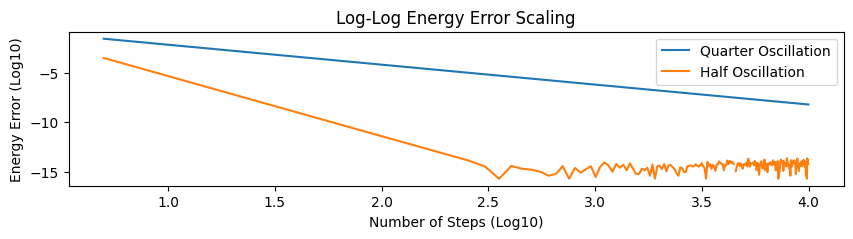

In [44]:
%matplotlib inline
# Perform leapfrog integration and check error with num steps
num_steps = np.arange(5, 10000, 50)
quarter_error_array = np.array([])
half_error_array = np.array([])

# Iterate through each value of num_steps and find the energy error
for steps in num_steps:
    steps = int(steps)
    # Half Oscillation
    positions, velocities, half_error = Leapfrog_C(x_initial, v_initial, steps, plot_e = False, plot_m = False)
    half_error_array = np.append(half_error_array, half_error)

    # Quarter Oscillation
    positions, velocities, quarter_error = Leapfrog_C(x_initial, v_initial, steps, half = False, plot_e = False, plot_m = False)
    quarter_error_array = np.append(quarter_error_array, [quarter_error])

# Plot the Energy Error
plt.figure(3, figsize=(10, 2))
plt.plot(np.log10(num_steps), np.log10(quarter_error_array), label = 'Quarter Oscillation')
plt.plot(np.log10(num_steps), np.log10(half_error_array), label = 'Half Oscillation')
plt.title("Log-Log Energy Error Scaling")
plt.xlabel('Number of Steps (Log10)')
plt.ylabel('Energy Error (Log10)')
plt.legend()
plt.show()

We can see in the graph above that for the half oscillation, round-off error is reached at around $10^{2.5} \approx 316$ steps, which is where the error begins fluctuating significantly. However, for the quarter oscillation, the error linearly decreases consistently all the way through to $10^4 = 10000$ steps.

From above, we know that analytically, the error scales as

$$ Error = \frac{h^6x^2}{16} - \frac{h^5vx}{4} + \frac{h^4v^2}{4} - \frac{h^4x^2}{4} + \frac{hv^3x^2}{2} + v^2 + x - (\frac{x^2 + v^2}{2})$$

In the graph above, as the number of steps over a constant interval increases, the step size is going to decrease. It makes sense that the quarter oscillation will have a larger energy as the step size increases because, as the step size decreases, the terms with lower dependence on $h$ (and therefore higher dependence on $x$ and $v$) will dominate the Error. As can be seen in the oscillatory motion graphs above, the quarter oscillation does not cross over itself ($v$ goes from 0 to -1, and $x$ goes from 1 to 0) which means on average these values do not average themselves out, leading to a larger magnitude of error over the course of the oscillation. For the half oscillation, even through $x$ goes from 1 to -1 (not cancelling itself), the velocity goes from 0 to 0, which means that there is no change in kinetic energy between the final and initial states.

# **Question 2** - Eigenvalue Problem for the wave on a string

## **a)** Difference Equations

Show that the difference equations for a wave on a string can be written in the form
$$ A \cdot f = \omega ^2b\cdot f$$
where $A$ is a tridiagonal matrix, and $b$ is a diagonal matrix.

**Proof:**

Consider the 1D wave equation for a string:
$$\rho(x)\frac{\partial ^2y}{\partial t^2} = T\frac{\partial ^2y}{\partial x^2}$$

where $\rho(x)$ is the density of the string at point x, $T$ is the tension (assumed constant), and $y$ is the vertical displacement of the string (assumed small). Assuming the string is fixed at both ends, we have a boundary value problem where $y = 0$ and $x = 0$ and $x = L$.

For a normal mode on the string, this equation reduces to
$$\frac{\partial ^2y}{\partial x^2} = -\frac{\omega^2\rho(x)}{T}y$$

To discretise this equation, replace the partial derivative with their respective finite difference approximations. Assuming a uniform grid with points in space and time, we can write the second derivative using central differences:
$$\frac{\partial ^2y}{\partial x^2} \approx \frac{y(x + \Delta x, t)-2y(x, t) + y(x - \Delta x, t)}{\Delta x^2}$$

Letting $y_i^n$ represent the value of the function at the $i^{th}$ spatial grid point and the $n^{th}$ time, we can replace the second derivatives in the wave equation to get:
$$\frac{\partial ^2y}{\partial x^2} = -\frac{\omega^2\rho(x)}{T}y$$
$$\Downarrow$$
$$\frac{y(x + \Delta x, t)-2y(x, t) + y(x - \Delta x, t)}{\Delta x^2} = -\frac{\omega^2\rho(x)}{T}y$$

If we relabel $y$ as $f$, we can rewrite the left-hand side as $A \cdot f$, where A is the matrix:

$$
A = \frac{1}{\Delta x^2}\begin{bmatrix}
-2 & 1 & 0 & \cdots & 0 \\
1 & -2 & 1 & \ddots & \vdots \\
0 & 1 & -2 & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 1 \\
0 & \cdots & 0 & 1 & -2 \\
\end{bmatrix}
$$

We can rewrite the right-hand side as $\omega^2 b \cdot f$, where $b$ is the diagonal matrix:

$$
b = -\frac{1}{T}\begin{bmatrix}
\rho(x = 0) & 0 & 0 & \cdots & 0 \\
0 & \rho(x = \Delta x) & 0 & \ddots & \vdots \\
0 & 0 & \rho(x = 2\Delta x) & \ddots & 0 \\
\vdots & \ddots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & 0 & \rho(x = N\Delta x) \\
\end{bmatrix}
$$

Therefore, the difference equation for the wave on a string can be represented in the form
$$A \cdot f = \omega ^2b\cdot f$$
where $A$ is a tridiagonal matrix, $b$ is a diagonal matrix, and $f$ is the vector representing the height values at different spatial grid points.


## **b)** Solving for the values

Use *scipy.linalg.eigh* to solve for the eigenvalues and eigenvectors. Plot the first 8 eigenfunctions $f(x)$ and compare the frequencies with our results from the shooting method. Do this for both a constant density string and a string with density $\rho \propto 1 + 10x^2$.

**Shooting Method code is taken from the GitHub solutions for the relevant exercise**

### Shooting Method

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.optimize
import scipy.special
from scipy.linalg import eigh

def derivs_const(x, y, omega):
    # Returns the derivatives of the wavefunction
    # for a constant density string with length 1
    f, g = y
    dfdx = g
    density = 1
    dgdx = - omega**2 * density * f
    return dfdx, dgdx

def do_integration_const(omega):
    result = scipy.integrate.solve_ivp(derivs_const, (1e-5,1), (0,1), dense_output=True, args=(omega,), atol=1e-8, rtol=1e-8)
    return result.y[0,-1]

def shoot_const():
    # Perform the Shooting Method for a constant density string
    # Code taken from the solution code for the shooting method on the GitHub
    fig = plt.figure(figsize = (6,10))
    plt.title("Shooting Method (Constant Density)")

    # We'll take advantage of the known frequencies for this case to define the search windows
    oms = np.pi * np.array((1,2,3,4,5,6,7,8))
    num = len(oms)
    x_array = []
    f_array = []

    for i, om in enumerate(oms):
        # search within 10% of the analytic frequency
        omega = scipy.optimize.brentq(do_integration_const, 0.9*om, 1.1*om)
        
        result = scipy.integrate.solve_ivp(derivs_const, (1e-5,1), (0,1), dense_output=True, args=(omega,), atol=1e-8, rtol=1e-8)
        x = result.t
        f = result.y[0]

        # find the number of zero crossings (not including the endpoints)
        n = ((f[1:-1] * f[:-2]) < 0).sum()

        x_array.append([x.copy()])
        f_array.append([f.copy()])

        plt.subplot(num,1,1+i)
        plt.plot(x, f)
        plt.plot((0,1),(0,0), 'ko')

    plt.show()

    return x_array, f_array

def mat_method(plot_modes, string_length, N, b_func):
    '''Perform the Matrix Method for a string
    plot_modes is the number of modes to plot
    string_length is the length of the string
    N is the number of grid points
    b_func is the function that defines the b matrix, which contains the string densities at each point
    '''

    dx = string_length / (N-1) # Spatial step size

    x = np.linspace(0, 1, N)

    #####################
    # Constant Density
    #####################

    A = np.diag(np.ones(N-1), k = -1) - np.diag(2*np.ones(N)) + np.diag(np.ones(N-1), k = 1)
    eigenvalues_const, eigenvectors_const = eigh(A, b_func(x), subset_by_index= [N-8, N-1])

    # Reverse the order of the eigenvalues and eigenvectors so it matches the shooting method order
    eigenvalues_const = eigenvalues_const[::-1]
    eigenvectors_const = eigenvectors_const[:, ::-1]

    # ### Plot Results ###
    fig1 = plt.figure(figsize = (6,10))
    
    # Title the graph depending on whether the density is constant or not
    if b_func(np.array([1])) != b_func(np.array([2])):
        plt.title("Matrix Method (Varying Density)")
    else:
        plt.title("Matrix Method (Constant Density)")

    for i in range(plot_modes):
        plt.subplot(plot_modes, 1, 1+i)
        ax1 = plt.gca()
        plt.plot(x, eigenvectors_const[:, i], label=f"Mode {i+1}")
        plt.plot((0,1),(0,0), 'ko')
        ax_c = plt.gca()

    ax_c.xaxis.set_tick_params(labelbottom=False)
    ax_c.yaxis.set_tick_params(labelleft=False)
    ax_c.set_xticks([])
    ax_c.set_yticks([])

    ax1.xaxis.set_tick_params(labelbottom=False)
    ax1.yaxis.set_tick_params(labelleft=False)
    ax1.set_xticks([])
    ax1.set_yticks([])

    plt.show()

def rho(x):
    # Returns the density of the string at a given point x
    # Helper function for the shooting method
    rho = 1.0 + 10*x**2
    #rho = np.ones_like(x)
    return rho

def derivs_vary(x, y, omega):
    # Returns the derivatives of the wavefunction
    f, g = y
    dfdx = g
    density = rho(x)
    dgdx = - omega**2 * density * f
    return dfdx, dgdx

def do_integration_vary(omega):
    result = scipy.integrate.solve_ivp(derivs_vary, (1e-5,1), (0,1), dense_output=True, args=(omega,), atol=1e-8, rtol=1e-8)
    return result.y[0,-1]

def shoot_vary():
    # Perform the Shooting Method for a varying density string
    # Code taken from the solution code for the shooting method on the GitHub

    # Evaluate the displacement at x=1 on a grid of omega
    oms = np.pi * np.linspace(0.1,5,100)
    result = np.array([do_integration_vary(om) for om in oms]) 
    # identify the zero-crossings as initial guesses for mode frequencies
    inds = np.where(np.diff(np.sign(result)))[0]

    plt.clf()
    num = len(inds)
    fig = plt.figure(figsize = (6,10))
    plt.title("Shooting Method (Varying Density)")

    for i, ind in enumerate(inds):
        omega = scipy.optimize.brentq(do_integration_vary, oms[ind], oms[ind+1])

        result = scipy.integrate.solve_ivp(derivs_vary, (1e-5,1), (0,1), dense_output=True, args=(omega,), atol=1e-8, rtol=1e-8)
        x = result.t
        f = result.y[0]

        # find the number of zero crossings (not including the endpoints)
        n = ((f[1:-1] * f[:-2]) < 0).sum()

        plt.subplot(num,1,1+i)
        plt.plot(x, f)
        plt.plot((0,1),(0,0), 'ko')

    plt.show()

### Constant Density

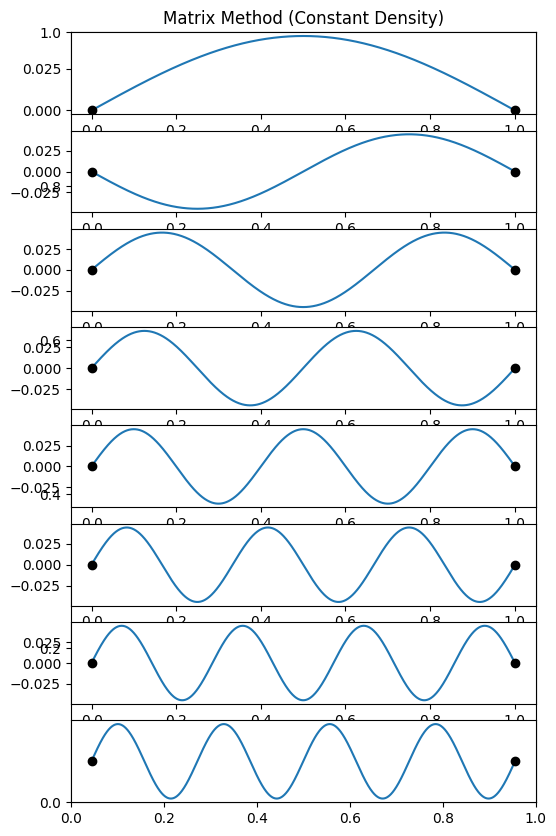

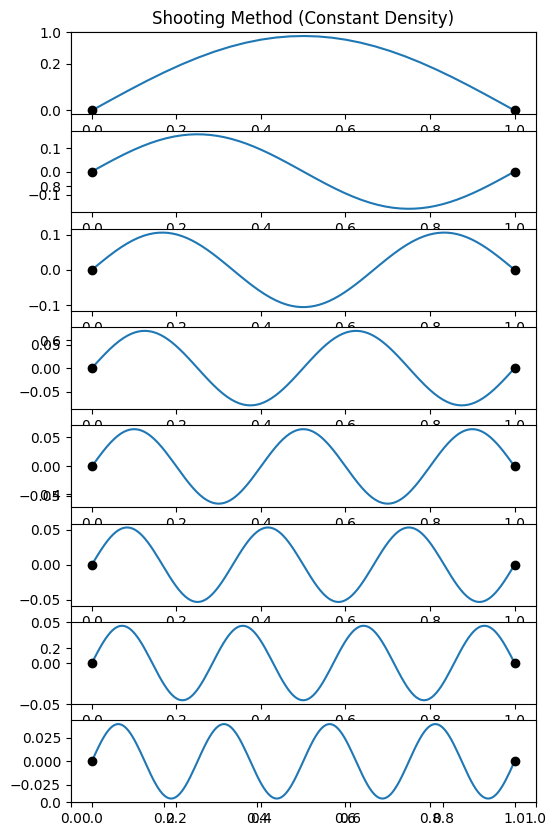

In [11]:
def b_const(x):
    # Returns the b matrix for a constant density string (density is 1 at all points)
    b = np.diag(np.ones(len(x)))
    return b

mat_method(8, 1, 1000, b_const) # plot first 8 modes for a constant density string with length 1 and 1000 grid points
shootx, shootf = shoot_const() # plot the shooting method result too

We can see here that the for the case of the constant density string, the shooting method and the matrix method both produce the same eigenmode waves.

### Varying Density

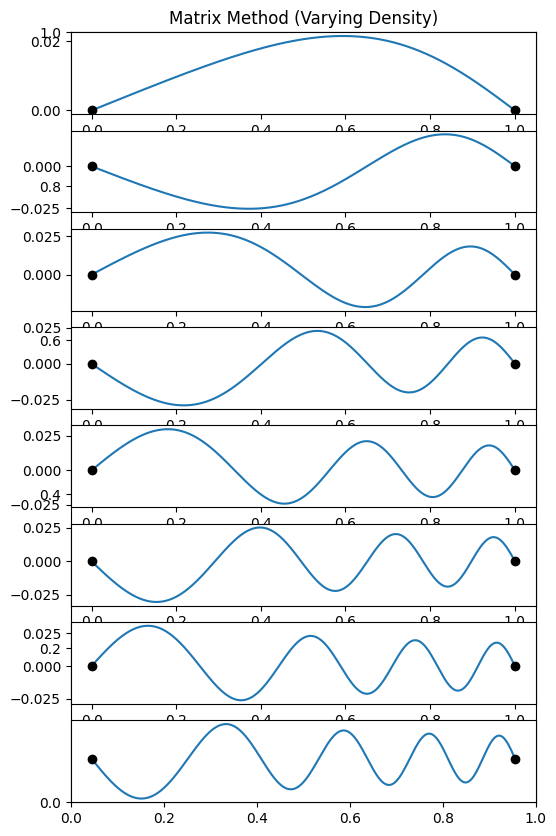

<Figure size 640x480 with 0 Axes>

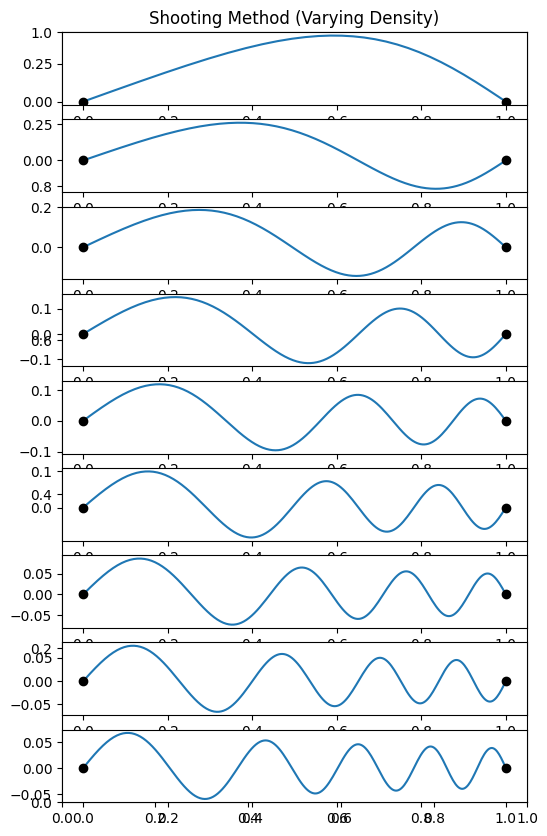

In [12]:
def b_vary(x):
    # Returns the b matrix for a varying density string (density is 1 + 10*x**2)
    b = np.diag((1 + 10*x**2)*np.ones(len(x)))
    return b

mat_method(8, 1, 1000, b_vary) # plot first 8 modes for a varying density string with length 1 and 1000 grid points
shoot_vary() # plot the shooting method result too

We can see here that the for the case of the varying density string, the shooting method and the matrix method both produce the same eigenmode waves. They both have a higher frequency at the higher density end of the string.

# **Question 3** - Leapfrogging an EM Wave

The reflection and transmission coefficients are:
$$r = \frac{n_2 - n_1}{n_2 + n_1}$$
$$t = \frac{2n_1}{n_2 + n_1} $$

Maxwell's Equations are:
$$\frac{\partial B}{\partial t} = -\frac{\partial E}{\partial x}$$
$$\frac{\partial E}{\partial t} = -\frac{1}{n(x)^2}\frac{\partial B}{\partial x}$$

where E and B are the electric and magnetic fields and we've set $c = 1$ for simplicity. Writing down a second-order finite difference approximation for both the space and time derivatives gives the update scheme, taking $\alpha = \frac{\Delta t}{\Delta x}$:
$$B_i^{n+1} = B_i^{n-1} - \alpha(E_{i+1}^{n} - E_{i-1}^{n})$$
$$E_i^{n+1} = E_i^{n-1} - \alpha(B_{i+1}^{n} - B_{i-1}^{n})\frac{1}{n_i^2}$$

Here, $i$ labels grid cell and $n$ labels the time step. Finding the values at time $n+1$ requires storing the values from both $n$ and $n-1$, so this is another example of the Leapfrog method.

NB: $\alpha < 1$ for a stable solution ($\Delta x < \Delta t$)

## **a)** Gaussian Profile

Code up the above algorithm and set refractive index $n = 1$ across the grid. Start with a Gaussian profile centered on your grid. Choose $E$ and $B$ to have the same profile.

In [34]:
import numpy as np
import matplotlib.pyplot as plt

def maxwell(dx, dt, left_n = 1, right_n = 1):
    ''' Performs Finite Differencing of Maxwell's Equations

    Inputs:
    dx is the spatial step size
    dt is the time step size
    E_sign is the sign of the electric field (1 or -1)
    B_sign is the sign of the magnetic field (1 or -1)
    T is the total time to integrate over in seconds
    left_n is the refractive index of the left half of the grid
    right_n is the refractive index of the right half of the grid
    gauss_centre is the centre of the gaussian pulse
    '''
    n_grid = 1001 # Number of grid points

    x = np.arange(n_grid) # Spatial grid

    alpha = dt/dx

    # Initial wavepacket
    E_init = np.ones(n_grid)
    E_init *= np.exp(-(x - n_grid // 6)**2 / 800)

    # Refractive index array
    n = np.ones(n_grid)
    n[n_grid//2:] = right_n
    n[:n_grid//2] = left_n

    # Initial magnetic field
    B_init = E_init * n

    # Arrays to store the electric and magnetic fields
    E_prev = np.copy(E_init)
    B_prev = np.copy(B_init)

    # Do an initial first order step
    E = E_prev - alpha * (np.roll(B_prev, -1) - np.roll(B_prev, 1)) / 2.0 / n**2
    B = B_prev - alpha * (np.roll(E_prev, -1) - np.roll(E_prev, 1)) / 2.0

    E_new = np.copy(E)
    B_new = np.copy(B)

    # Calculate the number of timesteps
    num_steps = int(0.6 * n_grid / alpha)

    # Plot starting profile  
    %matplotlib
    plt.ion()
    plt.plot(x, E, color = "firebrick", linestyle = "--", label='Initial E')
    plt.plot(x, B, color = "dodgerblue", linestyle = ":", label='Initial B')
    plt.plot([n_grid//2, n_grid//2],[-1.5, 1.5], 'k', alpha = 0.2, linewidth=2) # Plot the boundary between the two refractive indices

    E_data, = plt.plot(x, E, color = "firebrick", label='E', linewidth = 3)
    B_data, = plt.plot(x, B, color = "dodgerblue", label='B')

    plt.ylim(-1.5, 1.5)
    plt.xlim(x[0], x[-1])

    plt.title("Electromagnetic Propagation")
    plt.legend()
    plt.show()

    # Iterate through each timestep
    for i in range(num_steps):
        # Calculate the new electric and magnetic fields
        E_new = E_prev - alpha * (np.roll(B, -1) - np.roll(B, 1)) / n**2
        B_new = B_prev - alpha * (np.roll(E, -1) - np.roll(E, 1))

        # Update the electric and magnetic fields
        E_data.set_ydata(E_new)
        B_data.set_ydata(B_new)
        plt.draw()
        plt.pause(1E-3)

        E_prev[:] = E[:]
        E[:] = E_new[:]
        B_prev[:] = B[:]
        B[:] = B_new[:]

    plt.ioff()
    plt.close()


    %matplotlib inline
    plt.plot(x, E, label='E', color = "firebrick")
    plt.plot(x, B, label='B', color = "dodgerblue")
    plt.ylim((-1.5, 1.5))
    plt.xlim((x[0], x[-1]))

    # plot the analytic reflection and transmission coeffs
    r = abs((right_n - left_n)/(right_n+left_n))
    t = 2 * left_n / (right_n + left_n)
    plt.plot([0, 1000], [r, r], 'k:', label = 'Analytic R')
    plt.plot([0, 1000], [t, t], 'k--', label = 'Analytic T')
    plt.plot([0, 1000], [-r, -r], 'k:')
    plt.plot([0, 1000], [-t, -t], 'k--')

    plt.title("Maxwell's Equations")
    plt.legend()

    plt.show()

## **b)** Left-Right Pulse

Now, set $n = n_1$ on the left half of the grid and $n = n_2$ on the right. Start a pulse in the left half moving toward the right.

Using matplotlib backend: QtAgg


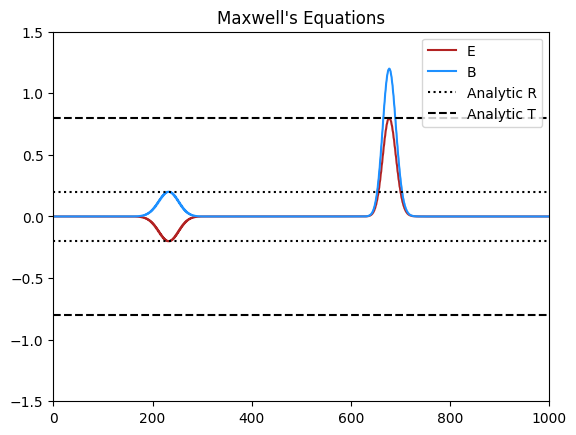

In [35]:
maxwell(1, 0.5, left_n = 1, right_n = 1.5)

This matches what we expect to happen as at the boundary between the mediums, there is both reflection and transmission.